In [1]:
%reset
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import os
indir = '/home/dannyp/repos/tensorflow-samples/submissions/for_merge'
first_run = True

for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        print(f)
        if (first_run): 
            df_merged = pd.read_csv('./submissions/for_merge/' + f)
            df_merged = df_merged.sort_values('fname')
            first_run = False
        else:
            df_right = pd.read_csv('./submissions/for_merge/' + f)
            df_right = df_right.sort_values('fname')

            df_merged = df_merged.merge(df_right, on = 'fname')


yaafe_077.csv
submission_079_005silence_on_predict.csv
GRU_075_1024x2_d05_D256_D128_E20_B512.csv
submission_078_6cnn_5filter_silencer005.csv
083_corrected_5k.csv
submission_077_deeper_silencer_50000.csv


In [3]:
df_mode = df_merged.iloc[:,1:].mode(axis=1)
df_merged.columns = ['fname'] + ['label_' + str(x) for x in range((df_merged.shape[1] - 1 ))]
df_merged['label'] = df_merged.iloc[:,1:].mode(axis=1)[0]

In [33]:
test_dir = '/home/dannyp/repos/tensorflow-samples/test/audio/'
test_file = df_merged.iloc[153531]['fname']
sample_rate, samples = wavfile.read(test_dir + test_file)
ipd.Audio(samples, rate=sample_rate)

In [4]:
df = df_merged.groupby('label_0')['fname'].count()
for l in range(1, len(df_merged.columns) - 2):
    df_occurences = df_merged.groupby('label_' + str(l))['fname'].count()
    df = pd.concat([df, df_occurences], axis = 1)

df.columns = ['yaafe77', 'cnn79', 'gru75', 'cnn78', 'corr83', 'cnn77']
print(df)

         yaafe77  cnn79   gru75   cnn78  corr83  cnn77
down        5998   4692    4838    4450    5108   5047
go          8680   4497    5729    4643    4880   5697
left        6302   6672    6059    4528    5283   4650
no          8685   7671    6132    5470    5376   5840
off         6495   7534    7289    7063    6742   6474
on          6312   5836    6094    4929    5267   5405
right       4889   5055    4884    4587    4835   6056
silence     7639   4910     122    5378    8155   7030
stop        5250   5723    5675    5471    5404   5982
unknown    85062  92074  100312  101943   97247  92794
up          7516   5747    5997    5139    5005   5935
yes         5709   8127    5407    4937    5236   7628


In [7]:
freq_map = {'down' : 5,
           'go' : 5,
           'left' : 1,
           'no' : 4,
           'off' : 1,
           'on' : 5,
           'right' : 3,
           'silence' : 3,
           'stop' : 1,
           'unknown' : 3,
           'up' : 2,
           'yes':4}

In [8]:
df_merged['manual_mix_label'] = 'unknown'
for word in 'silence go stop off yes no up down left right on'.split():
    df_merged.loc[df_merged['label_' + str(freq_map[word])]==word, ['manual_mix_label']] = word
    #print(df_merged['manual_mix_label'].head(10))
    plt.figure()
    plt.title(word)
    plt.hist(df_merged['manual_mix_label'])
    

In [11]:
df_merged.groupby(['label']).count()

,fname,label_0,label_1,label_2,label_3,label_4,label_5,manual_mix_label
label,,,,,,,,
down,4994,4994,4994,4994,4994,4994,4994,4994
go,5135,5135,5135,5135,5135,5135,5135,5135
left,5472,5472,5472,5472,5472,5472,5472,5472
no,5731,5731,5731,5731,5731,5731,5731,5731
off,6919,6919,6919,6919,6919,6919,6919,6919
on,5241,5241,5241,5241,5241,5241,5241,5241
right,4916,4916,4916,4916,4916,4916,4916,4916
silence,7103,7103,7103,7103,7103,7103,7103,7103
stop,5540,5540,5540,5540,5540,5540,5540,5540


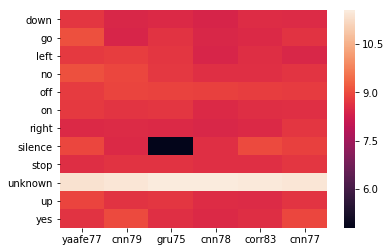

In [12]:
import seaborn as sns
%matplotlib inline
sns.heatmap(np.log(df))

In [13]:
df_submission = df_merged[['fname', 'label']]
df_submission.columns = ['fname', 'label']
df_submission.to_csv('./submissions/new/submission_merged1.csv', index=False)